In [2]:
import numpy as np
from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from pprint import pprint
from FPMpkg.fpm_frame import FPMRecover

# FPM(Fourier Pytchography Microscopy) Simulation

----

### 图像读取与全局参数设置
- 读取图片

In [3]:
cameraman = io.imread("Resources\\cameraman.tif", as_gray=True)
westdoor = resize(io.imread("Resources\\westdoor.png", as_gray=True), (256, 256))
lenna = io.imread("Resources\\Lenna.png", as_gray=True)

### 导入 FPM 恢复算法框架, 并迭代50次

In [4]:
fpm_init = FPMRecover(amplitude=cameraman,
                      phase=np.pi*westdoor)

object_recover_list = fpm_init.recover_process(n_loop=50, output_list=True)

### 数据可视化：初始算法结果随迭代次数变化

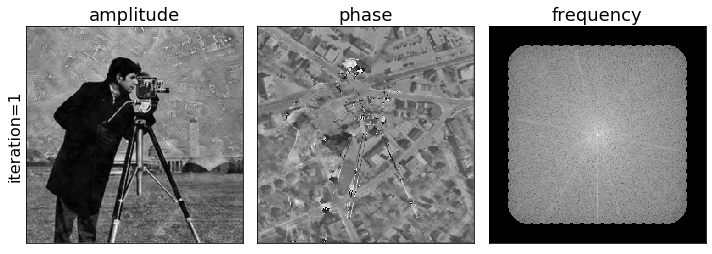

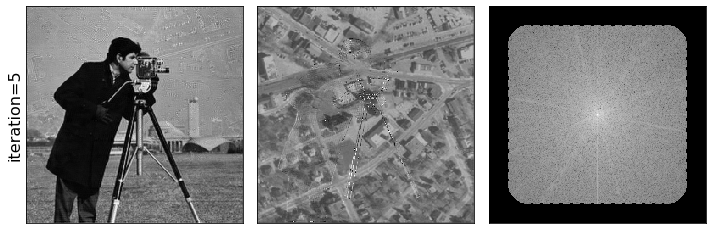

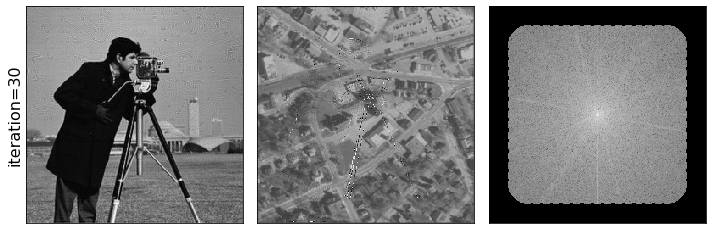

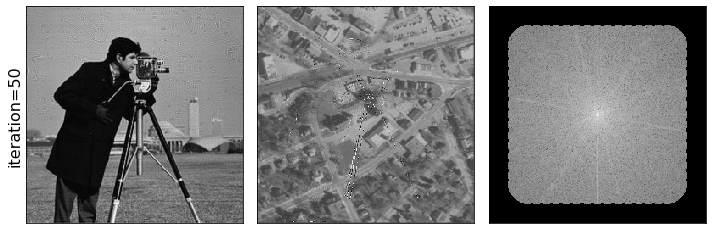

In [22]:
for i in range(50):
    obj_i = object_recover_list[i][0]
    obj_list = [abs(obj_i), np.angle(obj_i), np.log(abs(fftshift(fft2(obj_i)))+1)]
    title_list = ["amplitude", "phase", "frequency"]
    if i+1 in [1, 5, 30, 50]:
        plt.figure(figsize=[10, 5])
        for n, img in enumerate(obj_list):
            plt.subplot(1, 3, n+1)
            plt.imshow(img, cmap="gray")
            if i == 0:
                plt.title(title_list[n], fontsize=18, color="black")
            plt.xticks([])
            plt.yticks([])
            if n == 0:
                plt.ylabel("iteration={}".format(i+1), fontsize=16, color="black")
        plt.tight_layout()
        plt.show()

### 已知相差 FPM 系统

附加不同距离的离焦相差，并观察原始恢复算法的恢复结果
- z = 50 um
- z = 100 um
- z = 150 um

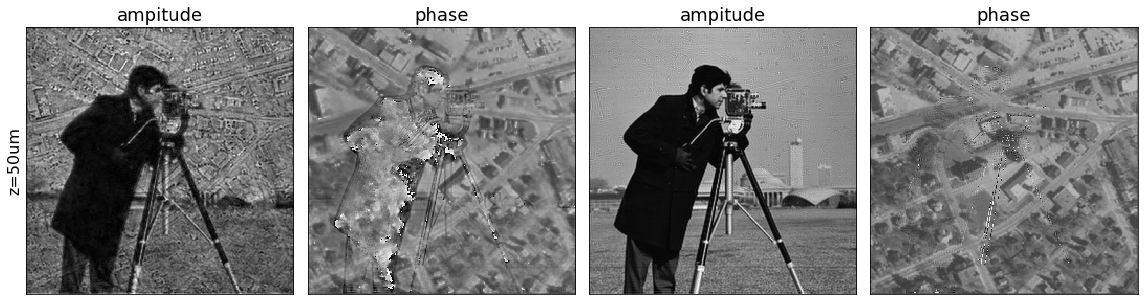

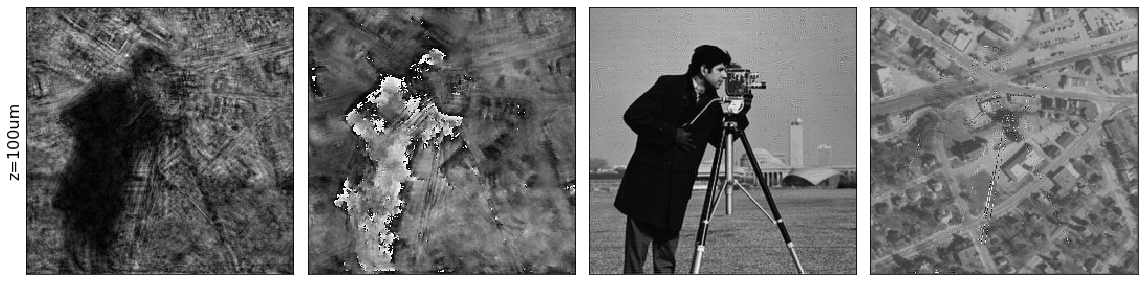

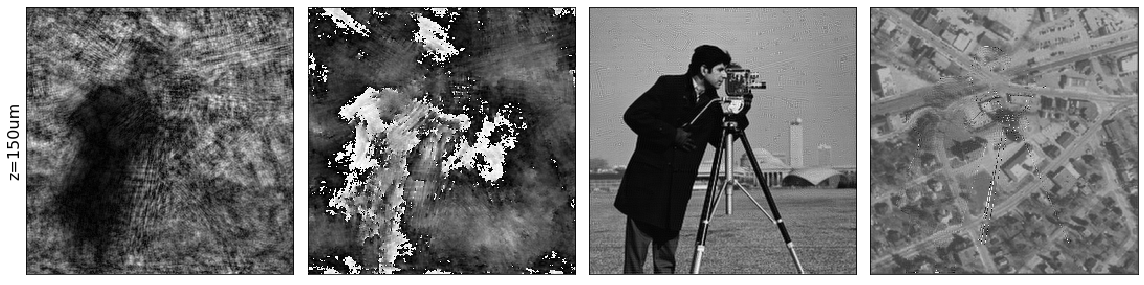

In [23]:
for z in [50e-6, 100e-6, 150e-6]:
    fpm_z = FPMRecover(amplitude=cameraman, phase=np.pi*westdoor, z_aber=z)
    object_recover = fpm_z.recover_process(30)
    obj_z = object_recover[0]
    
    fpm_z_r = FPMRecover(amplitude=cameraman, phase=np.pi*westdoor, z_aber=z)
    object_recover_r = fpm_z_r.recover_process(30, iter_mode="known_abr")
    obj_z_r = object_recover_r[0]
    
    image_list = [abs(obj_z), np.angle(obj_z), abs(obj_z_r), np.angle(obj_z_r)]
    title_list = ["ampitude", "phase", "ampitude", "phase"]
    
    plt.figure(figsize=[16, 8])
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(image_list[i], cmap="gray")
        if z == 50e-6:
            plt.title(title_list[i], fontsize=18, color="black")
        plt.xticks([])
        plt.yticks([])
        if i == 0:
            plt.ylabel("z={:d}um".format(int(z/1e-6)), fontsize=16, color="black")
    plt.tight_layout()
    plt.show()

### 未知相差恢复 version2

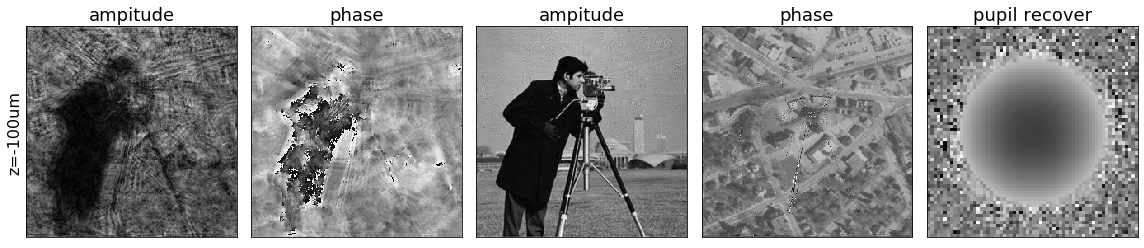

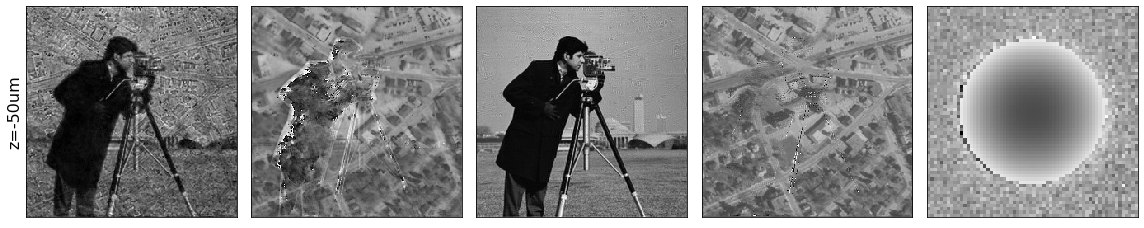

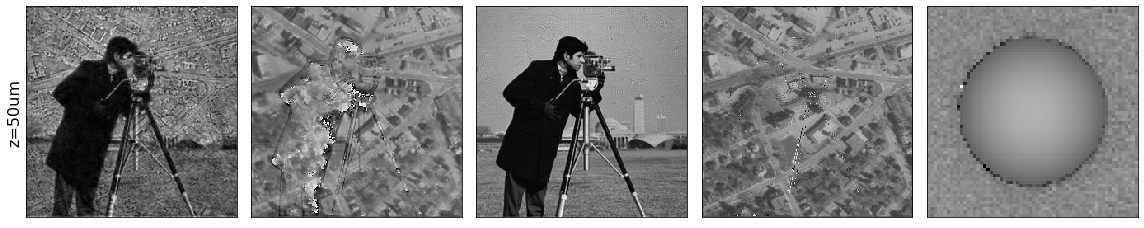

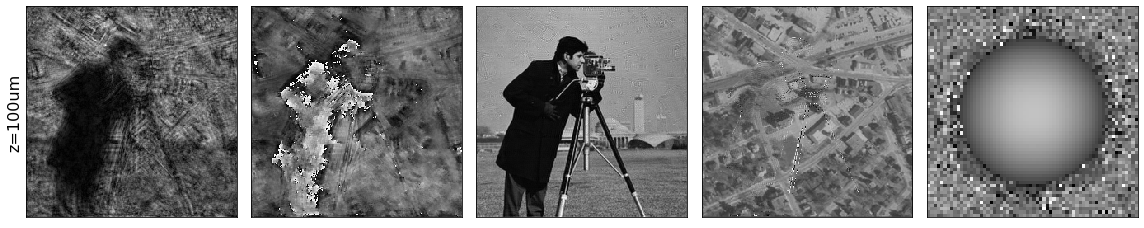

In [24]:
for z in [-100e-6, -50e-6, 50e-6, 100e-6]:
    fpm_z = FPMRecover(amplitude=cameraman, phase=np.pi*westdoor, z_aber=z)
    object_recover = fpm_z.recover_process(30)
    obj_z = object_recover[0]
    
    fpm_z_r = FPMRecover(amplitude=cameraman, phase=np.pi*westdoor, z_aber=z)
    object_recover_r = fpm_z_r.recover_process(30, iter_mode="unknown_abr")
    obj_z_r, pupil_e = object_recover_r
    
    image_list = [abs(obj_z), np.angle(obj_z), abs(obj_z_r), np.angle(obj_z_r), np.angle(pupil_e)]
    title_list = ["ampitude", "phase", "ampitude", "phase", "pupil recover"]
    
    plt.figure(figsize=[16, 8])
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(image_list[i], cmap="gray")
        if z == -100e-6:
            plt.title(title_list[i], fontsize=18, color="black")
        plt.xticks([])
        plt.yticks([])
        if i == 0:
            plt.ylabel("z={:d}um".format(int(z/1e-6)), fontsize=16, color="black")
    plt.tight_layout()
    plt.show()